In [325]:
# setup packages 
import pandas as pd
import numpy as np    

# for linear regression
import scipy.stats as st

# for plotting 
import matplotlib.pyplot as plt
# for all the plots in matplot lib, we set custom axes and grids
plt.rc('axes', axisbelow = True)

In [326]:
# load the data
df = pd.read_csv('rock_unit_data.csv')
print(df)

     Porosity (%)  Density (g/cm^3)
0       16.236204          2.807440
1       33.521429          2.896091
2       26.959818          2.318003
3       22.959755          2.110052
4        9.680559          2.227935
..            ...               ...
115     31.143818          2.722452
116     29.110162          2.280772
117     10.597102          2.024316
118     31.776770          2.645472
119     21.180267          2.177111

[120 rows x 2 columns]


In [327]:
# geostatistical summary 

df.describe()

# adding the .transpose() method makes this linear
# df.describe().transpose()

,Porosity (%),Density (g/cm^3)
count,120.000000,120.000000
mean,19.313302,2.483466
std,8.934840,0.287430
min,5.165664,2.005062
25%,10.940974,2.239081
50%,19.490158,2.502658
75%,27.705788,2.705309
max,34.606608,2.985650


Next, we split samaple data into a 1D array

In [328]:
# y-axis 
y = df['Porosity (%)'].values; #simply copy the name of the exact column in the csv file
# You can make the code more readable by removing the "%" from the column head of csv
yname = 'Porosity';
yunit = '%';
ylabel = 'Porosity ('+ yunit + ')';
ymin = 0.0;
ymax = 40.0;

# x-axis
x = df['Density (g/cm^3)'].values;
xname = 'Density';
xunit = 'g/cm^3';
xlabel = 'Density ('+ xunit + ')';
xmin = 1.0;
xmax = 4.0;

dx = np.linspace(xmin, xmax, 100); #where dx = change in y wrt x

In [329]:
print('Predictor: ' + xname + ', label: ' + xlabel)
print('Response: ' + yname + ', label: ' + ylabel)

Predictor: Density, label: Density (g/cm^3)
Response: Porosity, label: Porosity (%)


Application of Linear Regression Model using the SciPy package

NB: Make sure to go back to heading and add the SciPy Package if you have not.

To perform linear regression:

In [330]:
lin_regression = st.linregress(x, y)

print('Output of lin_regression func is ' + str(type(lin_regression)) + ": \n") 
# '\n' reps line break - can be applied at the end or beginning

print(lin_regression) # This prints all the result at once

# In order to seperate the results:
print('\nLinear Regression Model')

print('Slope: ' + str(round(lin_regression.slope, 3))) #returns a str, rounded to a 3dp
print('Intercept: ' + str(round(lin_regression.intercept, 3)))
print('Square root of R-value: ' + str(round(lin_regression.rvalue, 3)))
print('Slope p-value: ' + str(round(lin_regression.pvalue, 3)))
print('Standard Error: ' + str(round(lin_regression.stderr, 3)))
print('Intercept Stanard Error: ' + str(round(lin_regression.intercept_stderr, 3)))

Output of lin_regression func is <class 'scipy.stats._stats_mstats_common.LinregressResult'>: 

LinregressResult(slope=-4.7143370152128785, intercept=31.0211985478159, rvalue=-0.15165810086736758, pvalue=0.09822482203409033, stderr=2.8285330061348346, intercept_stderr=7.071067298242876)

Linear Regression Model
Slope: -4.714
Intercept: 31.021
Square root of R-value: -0.152
Slope p-value: 0.098
Standard Error: 2.829
Intercept Stanard Error: 7.071


##### Model Comparism

We contruct two linear regression slopes

In [331]:
#first assumed slope, say fSlope
f_Slope = -5.0  # assuming pre-defined slope

ypredic = lin_regression.intercept + lin_regression.slope*x # where ypredic = predicted values of y
f_ypredic = lin_regression.intercept + f_Slope*dx # where f_ypredic is predicted values of y from f_Slope
mean_diff = np.average(y) - np.average(f_Slope) # actual - assumed mean
adj_intercept = lin_regression.intercept + mean_diff # To align the mean of predictions with the mean of actual data points.

# New predictions (call it: g_ypredic) using adjusted intercept and assumed slope (f_Slope)
g_ypredic = adj_intercept + f_Slope * x

Visualize the models

We utilize matplotlib - Add it to the first code cell containing our imports

(0.0, 40.0)

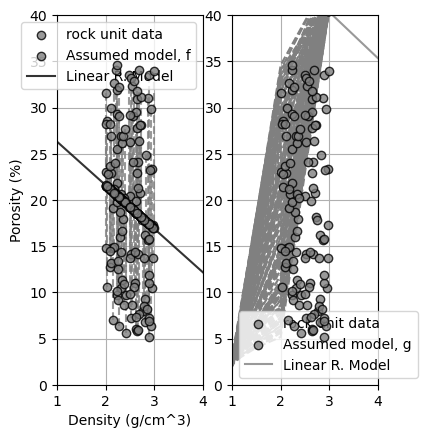

In [332]:
# Plots: PART A
# considering the first assummed plot, f_Slope;

plt.subplot(131)

# for x and y
plt.scatter(x, y, color='black', facecolor = 'grey', alpha=.8, zorder = 10, label = 'rock unit data') # within the paranthesis are the properties that can be set to the method '.scatter'
# for x and assumed slope, f_slope
plt.scatter(x, ypredic, color='black', facecolor = 'grey', alpha=.8, zorder = 10, label = 'Assumed model, f')
# Actual plot
plt.plot(dx, lin_regression.intercept + lin_regression.slope*dx, color='black', alpha=0.8, zorder = 1, label = 'Linear R. Model')

# algorithm for each pair
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i], ypredic[i]], c = 'grey', alpha = 0.8, ls = '--', zorder = 1)
    
# add a title
plt.title = 'Rock data and least sqaure best fit regression model'

# Append declared xlabel above to the method of xlabel and ylabel in matplotlib
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Add a legend 
plt.legend()

# Show grid
plt.grid(True)

# set limits from above df
plt.xlim([1.0, 4.0])
plt.ylim([0, 40])


# Conidering the second assumed plot, g_ypredic;
plt.subplot(132)

# for x and y
plt.scatter(x, y, color='black', facecolor = 'grey', alpha=.8, label = 'rock unit data', zorder = 10) # within the paranthesis are the properties that can be set to the method '.scatter'
plt.scatter(x, g_ypredic, color='black', facecolor = 'grey', alpha=.8, label = 'Assumed model, g', zorder = 10)

# Actual plot
plt.plot(dx, adj_intercept + f_Slope*dx, color = 'grey', alpha=.8, zorder = 1, label = 'Linear R. Model')

# Algo for plotting each pair
for i in range(len(x)):
    plt.plot([x[i], x[i], y[i], g_ypredic[i]], color='gray', ls='--', zorder=1)

# add title of second assumed
plt.tile = ('Rcok unit data for assumed regression model')

# add legend
plt.legend()

# set grid
plt.grid(True)

# set limits as well from above df
plt.xlim([1.0, 4.0])
plt.ylim([0, 40])

Plots: PART B - Model Evaluation - Loop (contd. from plots - PART A)

The loop in the code block below iterates over different slopes (from 0.0 to 12.0 in steps of 0.5)

For each slope; 
- it computes new predictions (new_f_ypredic), 
- adjusts the intercept (new_adj_intercept, and
- calculates new predictions (new_g_ypredic)


In [333]:
# Plots: PART B - Model Evaluation - Loop (contd. from plots - PART A)

for new_f_slope in np.arange(0.0, 12.0, 0.5):  # Use np.arange for floating-point ranges
    new_f_ypredic = lin_regression.intercept + new_f_slope * x
    new_mean_diff = np.average(y) - np.average(new_f_ypredic)
    new_adj_intercept = lin_regression.intercept - new_mean_diff
    new_g_ypredic = new_adj_intercept + f_Slope * x
    mean_sqr_err = np.linalg.norm(new_g_ypredic - y)


In [334]:
#minor adjustments to plot figure

plt.subplots_adjust(top = 1.21, bottom = 0.0, left = 0.0, right = 2.0, wspace = 0.1, hspace = 0.2)

<Figure size 640x480 with 0 Axes>

In [335]:
# Visualize

plt.show()